# Analysis of Each Add-On Service and Its Impact

Introduction
In this project, we will analyse the contribution of each Add-On Service to the total sales volume of **"Item Group = Service"** per outlet. This analysis is important to understand the extent to which each Add-On Service affects overall sales and how business strategies can be improved based on these findings.

Data already clean. So we will perform the following steps:
* Initial Analysis with SQL: Run SQL queries to get basic data.
* Advanced Analysis with Python: Using Python for deep analysis and visualisation.

In [1]:
import pandas as pd
from pandasql import sqldf

# load dataset
data = pd.read_csv('/kaggle/input/salesbk/SALESBK.csv')

# Define a lambda function to run the query
sql = lambda q: sqldf(q, globals())

In [2]:
# Query 1: Total Transactions for All Services
query1 = """
SELECT Outlet, 
       SUM(Qty) as TotalQTYJasa, 
       SUM(Amount) as TotalAmountJasa
FROM data
WHERE ItemGroup REGEXP 'Jasa'
GROUP BY Outlet;
"""

# Menjalankan query pertama
total_jasa = sql(query1)

# Menampilkan hasil
print("Total Transaksi untuk Semua Jasa:")
print(total_jasa)

Total Transaksi untuk Semua Jasa:
              Outlet  TotalQTYJasa  TotalAmountJasa
0        BK01 - ATMI          1370         56482000
1       BK05 - JAKAL          1357         57049000
2  BK07 - GAJAH MADA          1335         52477000
3    BK09 - PLEBURAN          1426         54676000
4      BK16 - GENTAN          1263         50016000


In [3]:
# Query 2: Total Transaksi untuk Semua Jasa Add-On
query2 = """
SELECT Outlet,ItemName, SUM(Qty) as TotalQTYAddOn, SUM(Amount) as TotalAmountAddOn
FROM data
WHERE ItemGroup REGEXP 'Jasa' AND ItemName REGEXP '003 Vitamin|004 Silet Razor|005 Facial Shave|006 Facial Shave & Full Trimming|006 Full Trimming|007 Wash Only|008 Hair Wash and Styling|009 Dandruff Scalling Free Dandruff Treatment Oil Rp 0|029 Styling Catok (L)|029 Styling Catok (M)|029 Styling Catok (S)|029 Styling Catok (XL)|030 Sculpting S FREE produk perawatan Neutralizer Serum Rp 0|034 Cat Reguler Black (S)|022 Black Mask Full Face|023 Black Mask Area Hidung|024 Purple Ligtening ( S )|095 Hair Wrapping (L)|096 Styling Curly (S)|097 Styling Curly (M)|098 Styling Curly (L)|099 Styling Curly (XL)|100 Tensei Perm (M)|101 Tensei Perm (L)|102 Down Perm (S)|103 Top Afro|104 Full Afro|105 Tensei Hairup|106 Totok Wajah|Aguaria 600 ml'
GROUP BY Outlet, ItemName 
;
"""
# Menjalankan query kedua
total_addon = sql(query2)

print("\nTotal Transaksi untuk Semua Jasa Add-On:")
print(total_addon)


Total Transaksi untuk Semua Jasa Add-On:
               Outlet                                           ItemName  \
0         BK01 - ATMI                                        003 Vitamin   
1         BK01 - ATMI                                    004 Silet Razor   
2         BK01 - ATMI                   006 Facial Shave & Full Trimming   
3         BK01 - ATMI                          008 Hair Wash and Styling   
4         BK01 - ATMI  009 Dandruff Scalling Free Dandruff Treatment ...   
5         BK01 - ATMI                           022 Black Mask Full Face   
6         BK01 - ATMI  030 Sculpting S FREE produk perawatan Neutrali...   
7        BK05 - JAKAL                                        003 Vitamin   
8        BK05 - JAKAL                                    004 Silet Razor   
9        BK05 - JAKAL                   006 Facial Shave & Full Trimming   
10       BK05 - JAKAL  009 Dandruff Scalling Free Dandruff Treatment ...   
11       BK05 - JAKAL                         

In [4]:
# Merge the query results of total services with total add-ons by Outlet
# In order to compare the contribution of add-ons to total services in each outlet
total_combined = pd.merge(
    total_addon,
    total_jasa,
    on='Outlet',
    how='left'
)

# Added qty and amount contribution columns for each add-on to the total service
total_combined['QtyContribution(%)'] = (total_combined['TotalQTYAddOn']/total_combined['TotalQTYJasa']) * 100
total_combined['AmountContribution(%)'] = (total_combined['TotalAmountAddOn']/total_combined['TotalAmountJasa']) * 100


# Show in clean table
from IPython.display import display, HTML # for tables

# Display contribution analysis results with tables that can be scrolled horizontally and vertically
print('\nContribution of Add-On to Total Service:')
display(HTML('''
<div style="overflow: auto; width: 120%; max-height: 400px; border: 1px solid #ccc;">
    ''' + total_combined.to_html(index=False) + '''
</div>
'''))


Contribution of Add-On to Total Service:


Outlet,ItemName,TotalQTYAddOn,TotalAmountAddOn,TotalQTYJasa,TotalAmountJasa,QtyContribution(%),AmountContribution(%)
BK01 - ATMI,003 Vitamin,311,933000,1370,56482000,22.700730,1.651854
BK01 - ATMI,004 Silet Razor,167,835000,1370,56482000,12.189781,1.478347
BK01 - ATMI,006 Facial Shave & Full Trimming,9,180000,1370,56482000,0.656934,0.318686
BK01 - ATMI,008 Hair Wash and Styling,2,20000,1370,56482000,0.145985,0.035410
BK01 - ATMI,009 Dandruff Scalling Free Dandruff Treatment Oil Rp 0,4,352000,1370,56482000,0.291971,0.623207
BK01 - ATMI,022 Black Mask Full Face,5,150000,1370,56482000,0.364964,0.265571
BK01 - ATMI,030 Sculpting S FREE produk perawatan Neutralizer Serum Rp 0,6,1620000,1370,56482000,0.437956,2.868170
BK05 - JAKAL,003 Vitamin,320,960000,1357,57049000,23.581430,1.682764
BK05 - JAKAL,004 Silet Razor,216,1080000,1357,57049000,15.917465,1.893109
BK05 - JAKAL,006 Facial Shave & Full Trimming,8,160000,1357,57049000,0.589536,0.280461


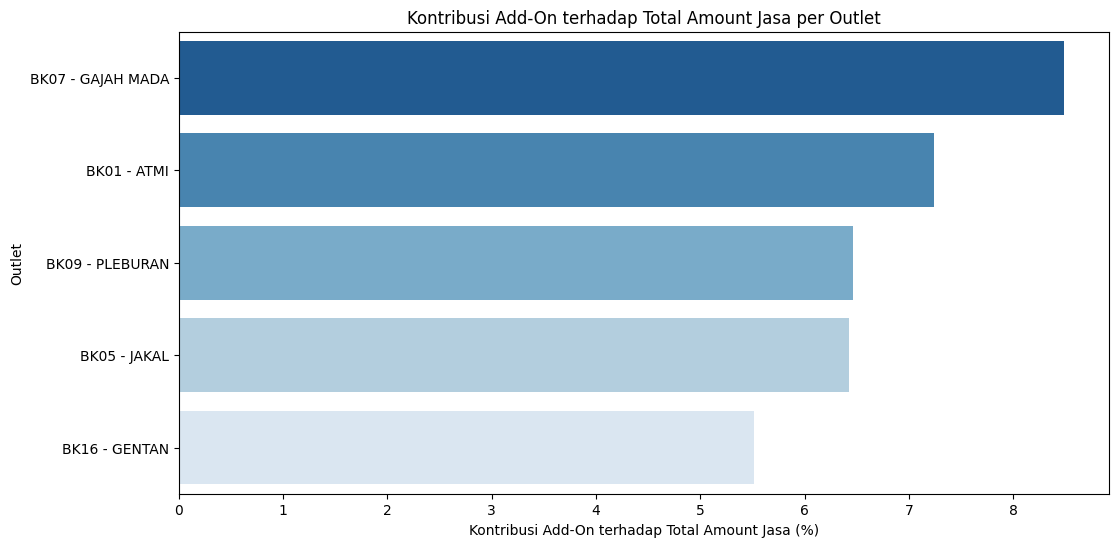

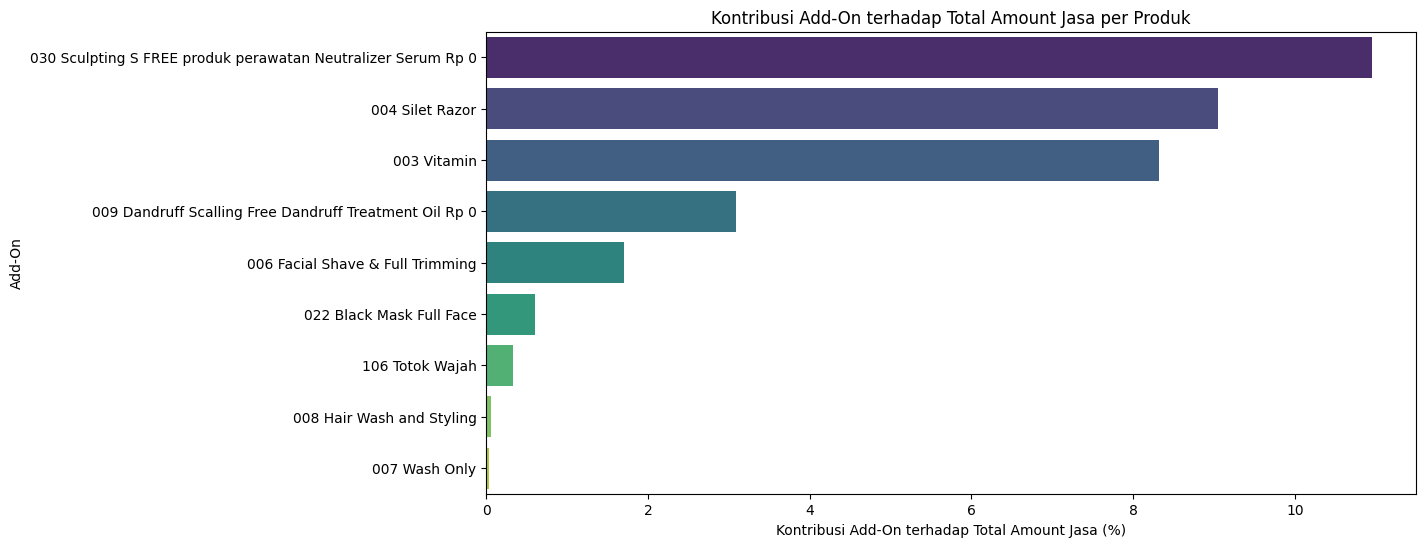

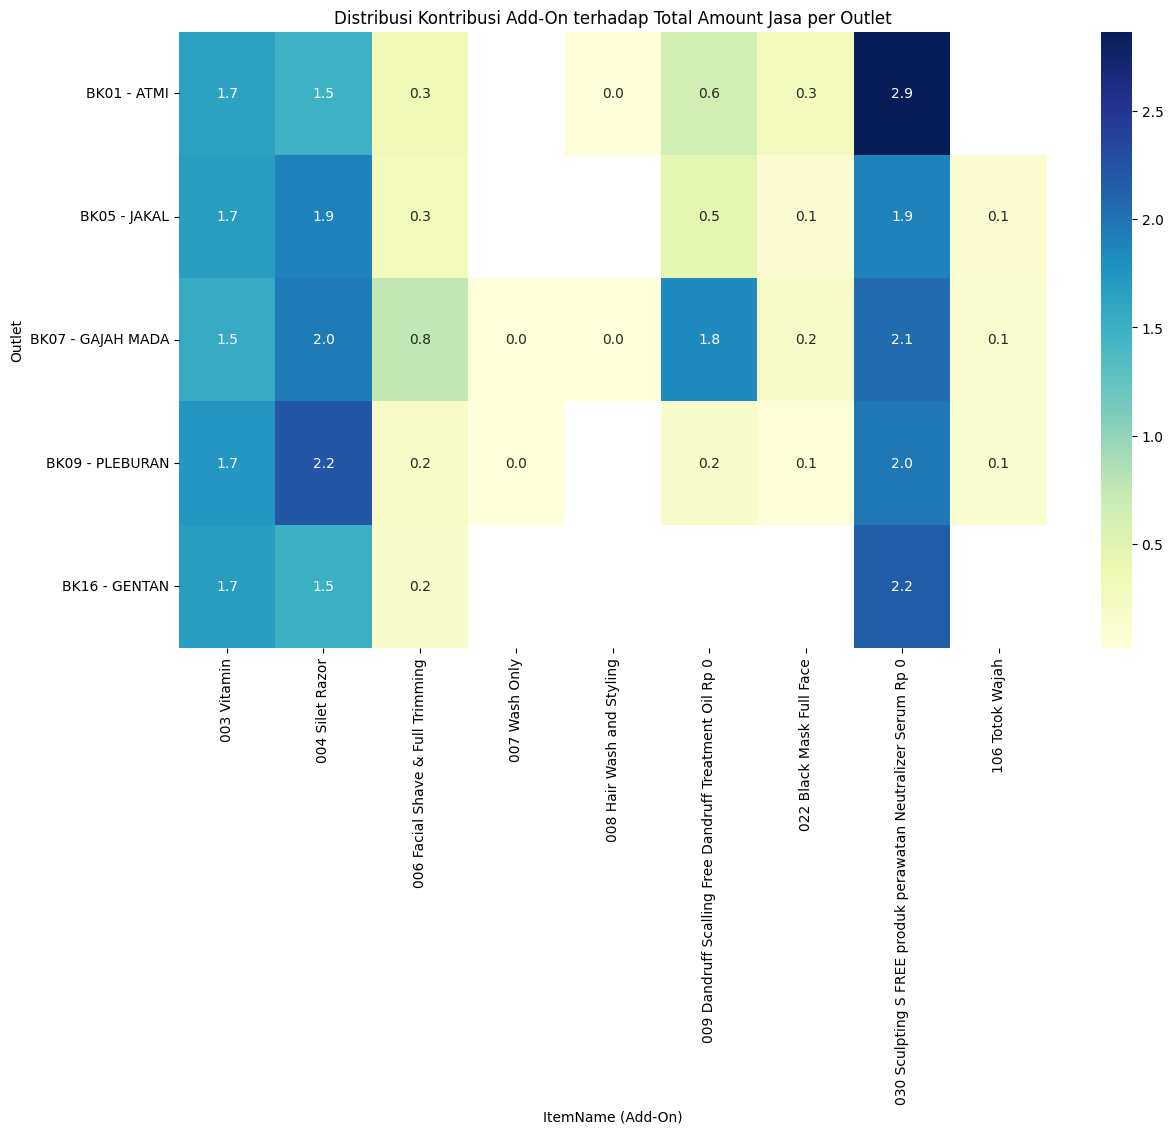

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting total_combined untuk visualisasi
sorted_outlets = total_combined.groupby('Outlet').sum().reset_index().sort_values(by='AmountContribution(%)', ascending=False)

# Barplot kontribusi Add-On per Outlet
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_outlets, x='AmountContribution(%)', y='Outlet', palette='Blues_r')
plt.xlabel('Kontribusi Add-On terhadap Total Amount Jasa (%)')
plt.ylabel('Outlet')
plt.title('Kontribusi Add-On terhadap Total Amount Jasa per Outlet')
plt.show()

# Agregasi data kontribusi Add-On per produk
addon_summary = total_combined.groupby('ItemName').sum().reset_index().sort_values(by='AmountContribution(%)', ascending=False)

# Barplot kontribusi Add-On per produk
plt.figure(figsize=(12, 6))
sns.barplot(data=addon_summary, x='AmountContribution(%)', y='ItemName', palette='viridis')
plt.xlabel('Kontribusi Add-On terhadap Total Amount Jasa (%)')
plt.ylabel('Add-On')
plt.title('Kontribusi Add-On terhadap Total Amount Jasa per Produk')
plt.show()

# Pivot table untuk heatmap
heatmap_data = total_combined.pivot_table(
    index='Outlet', 
    columns='ItemName', 
    values='AmountContribution(%)', 
    aggfunc='sum'
)

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True)
plt.title('Distribusi Kontribusi Add-On terhadap Total Amount Jasa per Outlet')
plt.xlabel('ItemName (Add-On)')
plt.ylabel('Outlet')
plt.show()

### **Business Interpretation Based on Add-On Contribution to Total Service**

Here’s a simplified interpretation of the data showing how Add-On services contribute to total sales at various outlets:


### **1. General Insights**
- **Popular Add-On Services**:
  - Services like **“003 Vitamin”** and **“004 Silet Razor”** are consistently top-performing, contributing 20%–23% of the total service quantity across most outlets. These are highly in demand.
  
- **High-Value Premium Services**:
  - **“030 Sculpting S…”** might have lower sales quantity (less than 1%), but it contributes significantly to revenue, reaching up to 2.87% in BK01 - ATMI. This means it’s a high-priced service with strong potential to boost profits.

- **Differences Between Outlets**:
  - Each outlet shows unique trends in Add-On contributions, likely influenced by customer preferences and local marketing strategies.


### **2. Outlet-Specific Observations**

#### **BK01 - ATMI**:
- **“003 Vitamin”**: 22.7% of quantity, 1.65% of revenue.
- **“004 Silet Razor”**: 12.19% of quantity, 1.48% of revenue.
- **“030 Sculpting S…”**: Small quantity (6 units) but contributes 2.87% to revenue.

#### **BK05 - JAKAL**:
- **“003 Vitamin”**: 23.58% of quantity, 1.68% of revenue.
- **“004 Silet Razor”**: 15.92% of quantity, 1.89% of revenue.
- **“030 Sculpting S…”**: Only 4 units sold but adds 1.89% to revenue.

#### **BK07 - GAJAH MADA**:
- **“003 Vitamin”**: 20.3% of quantity, 1.55% of revenue.
- **“004 Silet Razor”**: 15.36% of quantity, 1.95% of revenue.
- **“030 Sculpting S…”**: Contributes 2.06% of revenue with just 4 units sold.

#### **BK09 - PLEBURAN**:
- **“003 Vitamin”**: 22.23% of quantity, 1.74% of revenue.
- **“004 Silet Razor”**: 17.04% of quantity, 2.22% of revenue.
- **“030 Sculpting S…”**: Adds 1.98% of revenue from only 4 units.

#### **BK16 - GENTAN**:
- **“003 Vitamin”**: 22.33% of quantity, 1.69% of revenue.
- **“004 Silet Razor”**: 11.88% of quantity, 1.50% of revenue.
- **“030 Sculpting S…”**: Only 4 units but contributes meaningfully to revenue.


### **3. Business Insights**

1. **Focus on Top Performers**:
   - Services like **“003 Vitamin”** and **“004 Silet Razor”** are widely popular and should remain a key focus. Consider promotions, bundles, or discounts to encourage even higher sales.

2. **Leverage Premium Services**:
   - Services like **“030 Sculpting S…”** may sell in small numbers but significantly increase revenue due to their high price. Staff can upsell these to customers who value premium treatments.

3. **Tailored Strategies for Each Outlet**:
   - Outlets show different patterns in service popularity. Customizing marketing efforts for each location can maximize sales. For example, focus on promoting “004 Silet Razor” more in outlets where it already performs well.

4. **Boost Low-Performing Add-Ons**:
   - Add-Ons like **“006 Facial Shave & Full Trimming”** and **“022 Black Mask Full Face”** have minimal contributions. Special campaigns or better visibility might help increase their sales.

5. **Monitor and Adapt**:
   - Regularly track Add-On performance to quickly spot changes in customer preferences and adjust strategies accordingly.


### **4. Summary**

Add-On services play a crucial role in boosting overall sales. By focusing on the most popular services, upselling premium treatments, and tailoring strategies to each outlet, the business can maximize both revenue and customer satisfaction.